# Tópico 6: Agrupamento e Regras de Associação

O Agrupamento ou Clustering faz parte das técnicas de **Aprendizado de Máquina não Supervisionado**, assim como os algoritmos de Regras de Associação (que encontram agrupamento em conjuntos de strings).

Ele pode ser aplicado para diferentes problemas que envolvam segmentação/agrupamento de dados.

Em geral, o desempenho destes algoritmos é menor do que aqueles obtidos com Classificadores. Entretanto, as técnicas de agrupamento apresentam a vantagem de não precisarem de dados rotulados (label).

### Bibliotecas utilizadas

In [2]:
import pandas as pd

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns
import scipy.cluster.hierarchy as sch   # Dendograma


# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

## Exemplo 1

    
### Moons

Reinaldo Sanchez-Arias, Assistant Professor of Data Science, Florida Polytechnic University, https://raw.githubusercontent.com/reisanar/datasets/master/moons.csv

### Carregando os dados

In [3]:
url_bd = 'https://raw.githubusercontent.com/reisanar/datasets/master/moons.csv'
moons = pd.read_csv(url_bd)

In [4]:
moons.head()

,X,Y
0,-0.415208,1.035735
1,0.058781,0.304334
2,1.109379,-0.509738
3,1.540948,-0.427550
4,0.929095,-0.532388


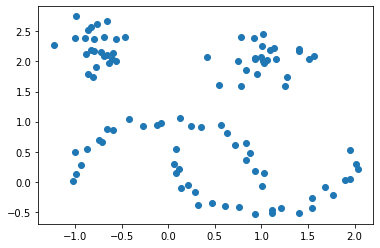

In [5]:
# Gráfico de DISPERSÃO
plt.scatter(x=moons['X'], y=moons['Y'])

### Criação do Modelos de Agrupamento

In [ ]:
# Modelos de agrupamento
rs=42
km = KMeans(n_clusters=4, random_state=rs)            # KNN k=4
gm = GaussianMixture(n_components=4, random_state=rs) # Gaussian Mixture k=4
db = DBSCAN(eps=0.4)

In [ ]:
# aplica o algoritmo e armazena o cluster de cada dado
km_c = km.fit_predict(moons)  # 
gm_c = gm.fit_predict(moons)  # Permite mistura entre grupos (bem parecido com k-means)
db_c = db.fit_predict(moons)  # Permite formatos não globulares

In [ ]:
km_c

In [ ]:
db_c

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.scatter(x=moons['X'], y=moons['Y'])
plt.title('Original')
plt.subplot(2,2,2)
plt.scatter(x=moons['X'], y=moons['Y'], c=km_c)
plt.title('KMeans')
plt.subplot(2,2,3)
plt.scatter(x=moons['X'], y=moons['Y'], c=gm_c)
plt.title('GaussianMixture')
plt.subplot(2,2,4)
plt.scatter(x=moons['X'], y=moons['Y'], c=db_c)
plt.title('DBSCAN')
plt.subplots_adjust(hspace = 0.35)

--------------------------

## Exemplo 2 - Grupo de Consumidores

Esse conjunto de dados ilustra alguns dados dos consumidores de um shopping. **Será que podemos encontrar grupos de consumidores com os dados acima?**

In [1]:
dados = pd.read_csv("mall.csv", sep=',')

NameError: name 'pd' is not defined

In [ ]:
dados.head()

### Analisando os dados
A seguir vamos analisar os tipos de dados que temos.

In [ ]:
dados.info()

In [ ]:
dados.shape

In [ ]:
dados.isnull().sum() # Ver se tem dados nulos (células vazias)

In [ ]:
dados.describe()

In [ ]:
dados.hist(figsize=(12,12))

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(dados[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(method = 'pearson'),
            annot=True, fmt=".1f");

In [ ]:
dados['Gender'].value_counts()

Boa proporção entre os generos que temos disponíveis em nossos dados.

Vamos fazer um gráfico completo com todos os dados para checarmos possíveis agrupamentos que podem ser realizados.

In [ ]:
sns.pairplot(dados)
plt.show()

Aparentemente o Annual Income e o Spending Score permitem alguns agrupamentos dos nossos dados. 

Podemos trabalhar com eles.

### Criando os agrupamentos
Vamos criar agrupamentos com diferentes metodologias:

### 1 - K-Means

In [ ]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

Vamos analisar a nossa previsao e os centroides:

In [ ]:
pd.Series(kmeans_labels).value_counts()

In [ ]:
centroides

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Escolhendo a quantidade de grupos usando o método do "cotovelo":

In [ ]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))
print(k)

In [ ]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma redução na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters:

In [ ]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

In [ ]:
dados['grupos kmeas'] = kmeans_labels

In [ ]:
dados_2 = dados[dados['grupos kmeas'] == 2]

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(dados_2.groupby('grupos kmeas').corr(method = 'pearson'),
            annot=True, fmt=".1f");

### 2 - DBSCAN

In [ ]:
#Criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)
#Ajustando aos dados
dbscan.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

Labels com -1 foram classificados como outliers

In [ ]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Checando a quantidade de valores que foram classificados como Outliers:

In [ ]:
list(mascara).count(False)

### 3 - Agrupamento Hierárquico

In [ ]:
# Criando o modelo
# linkage = ‘ward’ minimizes the variance of the clusters being merged.
model = AgglomerativeClustering(n_clusters=5,linkage='ward')

model.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
hierarquico_labels = model.labels_
hierarquico_labels

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=hierarquico_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides

plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Visualizando o dendrograma

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(dados[['Annual Income (k$)','Spending Score (1-100)']], method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()

### 4 - Avaliando o Desempenho dos Algoritmos

(a) Usando o **Adjusted Rand Index**

Comparação entre K-Means e Agrupamento Hierarquico:

In [ ]:
adjusted_rand_score(kmeans_labels,hierarquico_labels)

Comparação entre K-Means e DBSCAN:

In [ ]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

Comparação entre Agrupamento Hierarquico e o DBSCAN:

In [ ]:
adjusted_rand_score(hierarquico_labels,dbscan_labels)

Percebemos que o KMeans e o Agrupamento hierarquico para esse caso conseguiram resultados mais próximos um do outro do que quando comparados com o DBSCAN

(b) Avaliando a métrica de **Silhouette**

KMEANS:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)

DBSCAN:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)

Agrupamento Hierarquico:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],hierarquico_labels)

---------------------------
## Exemplo 3 - Segmentação de Imagens de Câncer de Mama

Vamos usar o dataset mini-MIAS disponível em http://peipa.essex.ac.uk/info/mias.html.

Este dataset possui 322 imagens de mamografias.

A **Segmentação de Imagem** envolve em colorir de uma mesma cor objetos ou partes de interesse. No caso do nosso dataset, iremos usar a segmentação de imagem para reduzir a resolução, aumentando o contraste entre diferentes regiões dos tecidos representados na imagem de mamografia.

O dataset é mais detalhado, possuindo inclusive tipos de câncer e anormalidades que ocorrem em cada uma das imagens.

Vamos apenas aplicar o K-Means em algumas imagens para observar o resultado:

In [ ]:
# Para processar arquivos e imagens
from PIL import Image
import glob
import numpy as np

# Para plotar imagens
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from sklearn.cluster import KMeans # Agrupamento 

In [ ]:
# Carregando as imagens

img_G = mpimg.imread('mias/mdb001.pgm') # Tipo G
img_D = mpimg.imread('mias/mdb003.pgm') # Tipo D
img_F = mpimg.imread('mias/mdb005.pgm') # Tipo F

In [ ]:
# Plotando as imagens

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1,1))
    kmeans = KMeans(n_clusters=clusters, random_state = 0, n_init=5)
    kmeans.fit(vectorized)
    
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]
    
    segmented_image = segmented_data.reshape((img.shape))
    return(segmented_image)

In [ ]:
clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters) # Tipo G
img_D_segmentada = filtro_kmeans(img_D, clusters) # Tipo D
img_F_segmentada = filtro_kmeans(img_F, clusters) # Tipo F

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)
plt.show()

Para mais informações de aplicação de técnicas de Agrupamento na segmentação de imagens, https://experiencor.github.io/segmentation.html

----------------------------------------
# Regras de Associação

Regras de Associação é um conjunto de técnicas de Aprendizado de Máquina Baseado em Regras (Rule-based machine learning - RBML) que pode ser usado para extraír regras lógicas de conjuntos de palavras (strings).

Esse método não está presente na biblioteca Scikit-Learn, por isso vamos usar o Apyori https://github.com/ymoch/apyori

Vejamos o exemplo a seguir usando dados sobre transações e produtos em compras de supermercado:

In [ ]:
from apyori import apriori,  load_transactions
import numpy as np

In [ ]:
with open('store_data.csv') as fi:
    transactions = list(load_transactions(fi, delimiter=','))

Cada elemento dessa lista tem um conjunto de transações. Por exemplo, a primeira trasação tem os itens:

In [ ]:
transactions[70]

In [ ]:
# Total de transações
len(transactions)

Podemos calcular o número médio de items por transação, e o seu desvio padrão, através de:

In [ ]:
n_items = [len(t) for t in transactions] 
print(np.mean(n_items))
print(np.std(n_items))

Vamos procurar por regras que tenham um suporte mínimo de 1% da base, com uma confidência mínima de 35%, pelo menos 2 itens, e que tenha um lift mínimo de 2:

In [ ]:
association_rules = list(apriori(transactions, min_support=0.01, min_confidence=0.35, min_lift=2, min_length=5))

In [ ]:
def print_itemset_rules(frequent_itemset):
    # itemset frequente está em frequent_itemset.items
    print('itemset: {'+", ".join(frequent_itemset.items)+'}, support: '+str(frequent_itemset.support))
    for i,rule in enumerate(frequent_itemset.ordered_statistics):
        antecedent = ', '.join(rule.items_base)
        consequent = ', '.join(rule.items_add)
        print('\tR'+str(i+1)+': '+antecedent+' => '+consequent+', confidence: '+str(rule.confidence))

In [ ]:
for frequent_itemset in association_rules:
    print_itemset_rules(frequent_itemset)
    print()